In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Flatten
import tensorflow.keras.backend as K

print(tf.__version__)

2023-11-29 20:23:31.660910: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.15.0


In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax') # output between 0 and 1 with a threshold of 0.5
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

x_train, x_test = x_train / 255.0, x_test / 255.0


In [20]:
def build_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax') 
    ])
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    # model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=3)])
    
    return model

In [13]:
def train_model(model, x_train, y_train, x_test, y_test, epochs=5):
    model.fit(x_train, y_train, epochs=epochs)
    test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
    print('\nTest accuracy:', test_acc)
    print('\nTest loss:', test_loss)
    return test_acc

In [21]:
model = build_model()
train_model(model, x_train, y_train, x_test, y_test, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 1ms/step - loss: 0.3418 - accuracy: 0.8981
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1728 - accuracy: 0.9492
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1345 - accuracy: 0.9604
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1130 - accuracy: 0.9667
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0985 - accuracy: 0.9704
313/313 - 0s - loss: 0.1232 - accuracy: 0.9639 - 473ms/epoch - 2ms/step

Test accuracy: 0.9639000296592712

Test loss: 0.12324531376361847


0.9639000296592712

### Fashion MNIST Database

In [24]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [30]:
import matplotlib.pyplot as plt
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

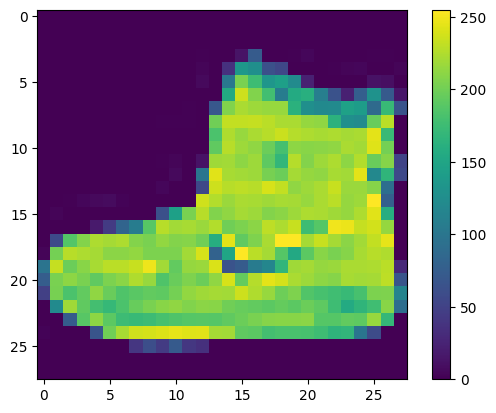

In [31]:
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [32]:
# Normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [34]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

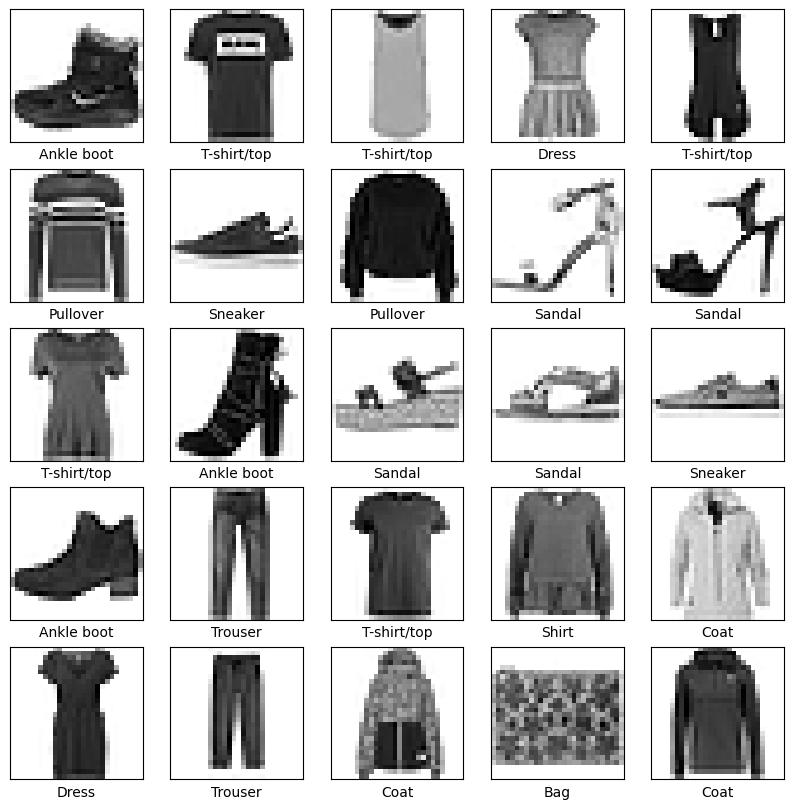

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [41]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [42]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6626 - accuracy: 0.7812
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4712 - accuracy: 0.8391
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4447 - accuracy: 0.8468
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4291 - accuracy: 0.8507
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4207 - accuracy: 0.8554
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4115 - accuracy: 0.8572
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4087 - accuracy: 0.8578
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4017 - accuracy: 0.8605
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3976 - accuracy: 0.8607
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.393

In [43]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 - 0s - loss: 0.4403 - accuracy: 0.8441 - 456ms/epoch - 1ms/step

Test accuracy: 0.8440999984741211

Test loss: 0.44029438495635986


In [44]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [45]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [46]:
import numpy as np

In [47]:
np.argmax(predictions[0])

9

In [48]:
test_labels[0]

9

In [49]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

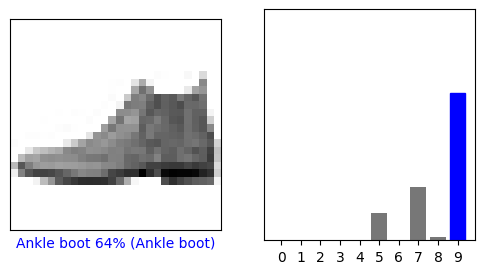

In [50]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

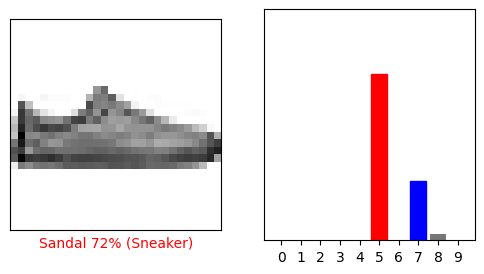

In [51]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

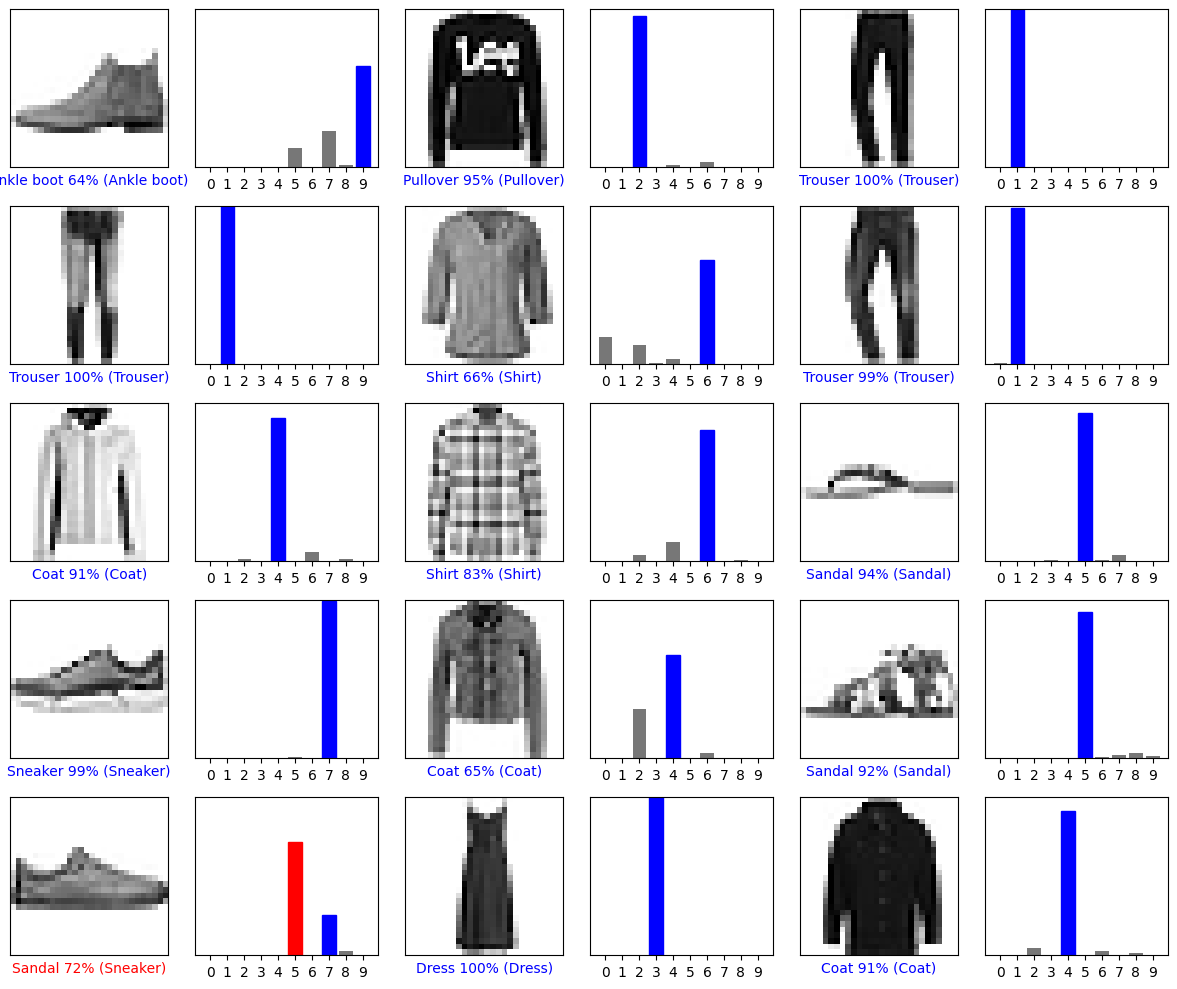

In [52]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()